In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from os import path
import pandas as pd
import numpy as np
from corputil import FileCorpus
from corputil.utils import load_stopwords
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = load_stopwords(path.join('data', 'german.txt'))

In [3]:
files = [
    path.join('data', 'Archive', 'Spiegel_Politik.txt'),
    path.join('data', 'Archive', 'Spiegel_Wirtschaft.txt'),
    path.join('data', 'Archive', 'Spiegel_Wissenschaft.txt'),
    path.join('data', 'Archive', 'Spiegel_Auto.txt'),
    path.join('data', 'Archive', 'Spiegel_Bildung.txt'),
    path.join('data', 'Archive', 'Spiegel_Geschichte.txt'),
    path.join('data', 'Archive', 'Spiegel_Kultur.txt'),
    path.join('data', 'Archive', 'Spiegel_Panorama.txt'),
    path.join('data', 'Archive', 'Spiegel_Reise.txt'),
    path.join('data', 'Archive', 'Spiegel_Sport.txt'),
    path.join('data', 'Archive', 'Spiegel_Technik.txt')]
tags = ['red', 'blue', 'cyan', 'yellow', 'orange', 'green', 'brown', 'purple', 'pink', 'lime', 'crimson']

def gen_chunks(l, n):
    return [l[i:i+n] for i in range(0, l.shape[0], n)
            if i+n < l.shape[0]]

In [4]:
X, y = [], []
for file, tag in zip(files, tags):
    for doc in FileCorpus(file).doc_token(stopwords=stopwords):
        X.append(' '.join(doc))
        y.append(tag)

df = pd.DataFrame()
df['doc'] = X
df['tag'] = y

df = df.iloc[np.random.permutation(len(df))]

In [5]:
vectorizer = TfidfVectorizer(min_df=20, max_df=0.5)
vectorizer.fit(df['doc'])
tfidf = vectorizer.transform(df['doc'])

In [6]:
prep = TruncatedSVD(n_components=50, random_state=0).fit_transform(tfidf)
chunks = gen_chunks(prep, 10000)

reduced = np.ndarray(shape=(0,2))
for chunk in chunks:
    temp = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(chunk)
    reduced = np.concatenate([reduced, temp])
    print('Processed 10000 articles...')

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.039075
[t-SNE] Iteration 25: error = 1.1987342, gradient norm = 0.0007868
[t-SNE] Iteration 25: gradient norm 0.000787. Finished.
[t-SNE] Iteration 50: error = 1.1599612, gradient norm = 0.0031473
[t-SNE] Iteration 75: error

In [7]:
ndf = pd.DataFrame(reduced)

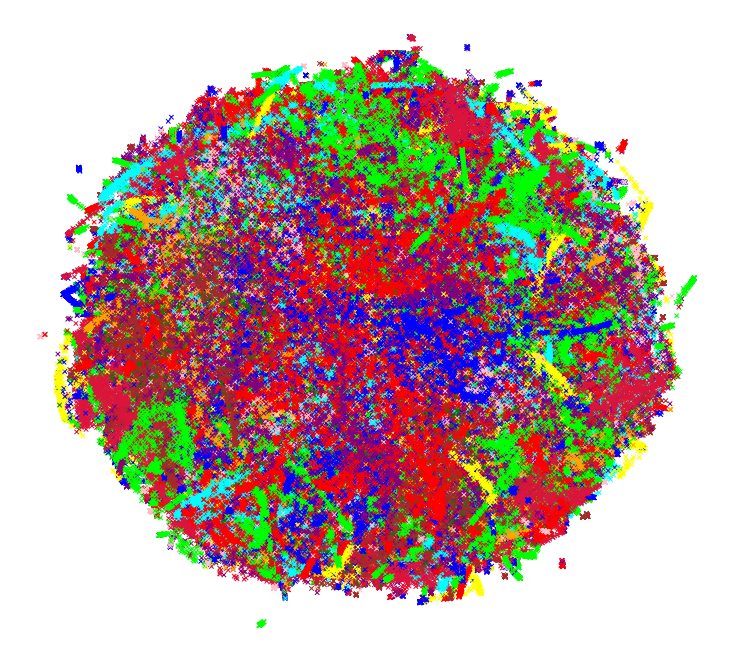

In [8]:
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(ndf[0], ndf[1], c=df['tag'], marker="x")